$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge Nº7 | Redes neuronales}$$


_Integrantes:_

* _José Cebrián Baca_

* _Ana Lucia Manrique De La Torre_

* _Willy Valdivia_

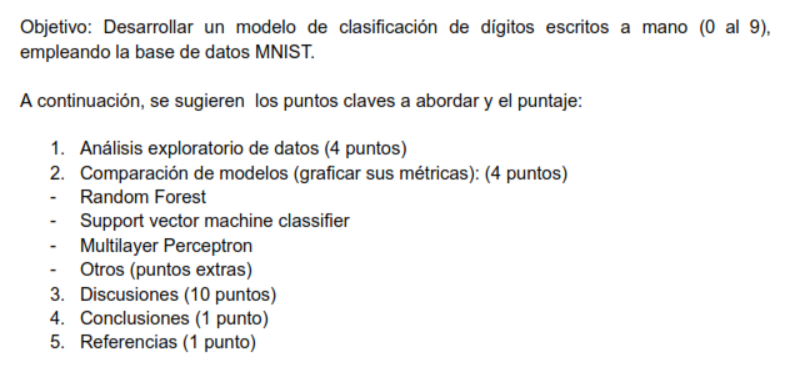

Se lee la data proveniente de la base de datos de la Organización Nacional de Puntos de Referencia e Innovación Modificada (MNIST). La base de datos del MNIST (Base de datos de la Organización Nacional de Puntos de Referencia e Innovación Modificada) es una enorme base de datos de dígitos escritos manualmente que se utiliza normalmente para preparar diferentes sistemas de manejo de imágenes [1].

# Análisis exploratorio de datos (EDA):

In [ ]:
import pandas as pd
df_train = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test = pd.read_csv('sample_data/mnist_test.csv', header=None)
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se cuenta cuantos valores unicos de la primera columna del DataFrame.

In [ ]:
df_train.iloc[:,0].value_counts() # labels

1    2243
7    2126
6    2039
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 0, dtype: int64

Se selecciona la primera fila del conjunto de datos del DataFrame, excluyendo la columna de etiquetas, y se reorganizan los valores en una matriz de tamaño 28x28 para generar una representación visual de la imagen. Luego, esta imagen se muestra en escala de grises.

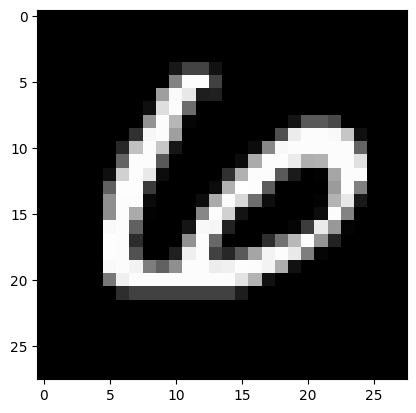

In [ ]:
import matplotlib.pyplot as plt

img = df_train.iloc[0,1:].to_numpy().reshape((28,28))
plt.imshow(img, cmap="gray")
plt.show()


De esta manera, es evidente que cada fila en el DataFrame representa los píxeles que conforman una imagen de un número (exceptuando los datos de la primera columna). Esto nos permite visualizar y comprender claramente la estructura de las imágenes en el conjunto de datos.

# Comparacion de modelos

## Entrenamiento de algoritmos de aprendizaje automatico

El principal objetivo fue clasificar imágenes de números como pares o impares. Por ello, se tomo la primera columna del dataframe donde estan las etiquetas de cada numero y se elaboro una columna la cual definio como etiquetas '0' cuando el numero era par y '1' cuando el numero era impar. De este modo, al tener entradas y salidas, se entrenaron y evaluaron tres modelos de clasificación: Support Vector Machine, RandomForest y LogisticRegression. Estos tuvieron el siguiente rendimiento:

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

X_train = df_train.iloc[:,1:].values/255
y_train = df_train.iloc[:,0].values
X_test = df_test.iloc[:,1:].values/255
y_test = df_test.iloc[:,0].values

# Convertir las etiquetas en par (0) e impar (1)
y_train = np.where(y_train % 2 == 0, 0, 1)
y_test = np.where(y_test % 2 == 0, 0, 1)

# Entrenar el modelo RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Hacer predicciones con RandomForest
y_pred_rf = rf.predict(X_test)

# Mostrar el informe de clasificación para RandomForest
print("Classification Report for RandomForest:")
print(classification_report(y_test, y_pred_rf))

# Entrenar el modelo Support Vector Machine
svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)

# Hacer predicciones con Support Vector Machine
y_pred_svm = svm.predict(X_test)

# Mostrar el informe de clasificación para Support Vector Machine
print("\nClassification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))

# Entrenar el modelo LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Hacer predicciones con LogisticRegression
y_pred_lr = lr.predict(X_test)

# Mostrar el informe de clasificación para LogisticRegression
print("\nClassification Report for LogisticRegression:")
print(classification_report(y_test, y_pred_lr))

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4926
           1       0.98      0.96      0.97      5074

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4926
           1       0.90      0.90      0.90      5074

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4926
           1       0.90      0.90      0.90      5074

    accuracy                           0.90 

Se realiza una visualización de muestras aleatorias de imágenes junto con las etiquetas reales y las etiquetas predichas por un modelo entrenado (en este caso, se usa el modelo RandomForest antes entrenado).

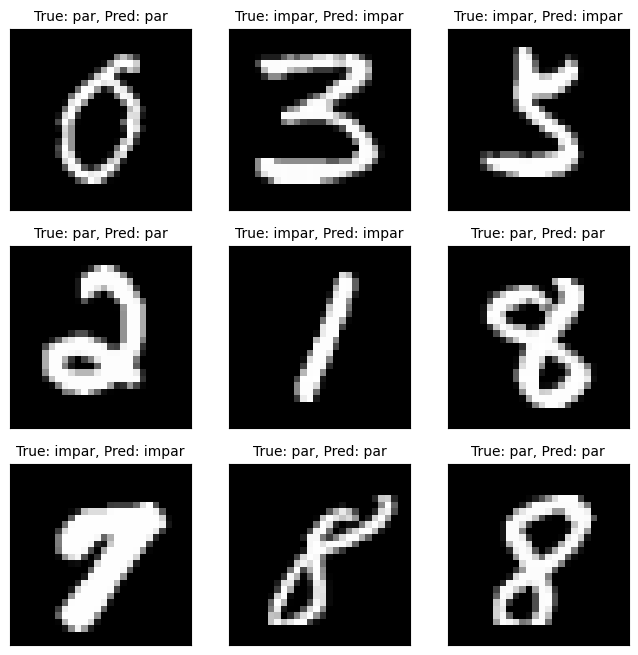

In [ ]:
import random

sample_indices = random.sample(range(len(X_test)), 9)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

y_pred = rf.predict(sample_images)

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].reshape((28,28)), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    true_label = 'par' if sample_labels[i] == 0 else 'impar'
    pred_label = 'par' if y_pred[i] == 0 else 'impar'
    ax.set_title(f'True: {true_label}, Pred: {pred_label}', fontsize=10)
    
plt.show()

Se realiza la visualización de la importancia de las características (features) en el modelo RandomForest y los coeficientes en el modelo Support Vector Machine (SVM). Estas visualizaciones son útiles para comprender qué pixeles de las iimagenes son más relevantes para cada modelo y cómo contribuyen a la toma de decisiones.

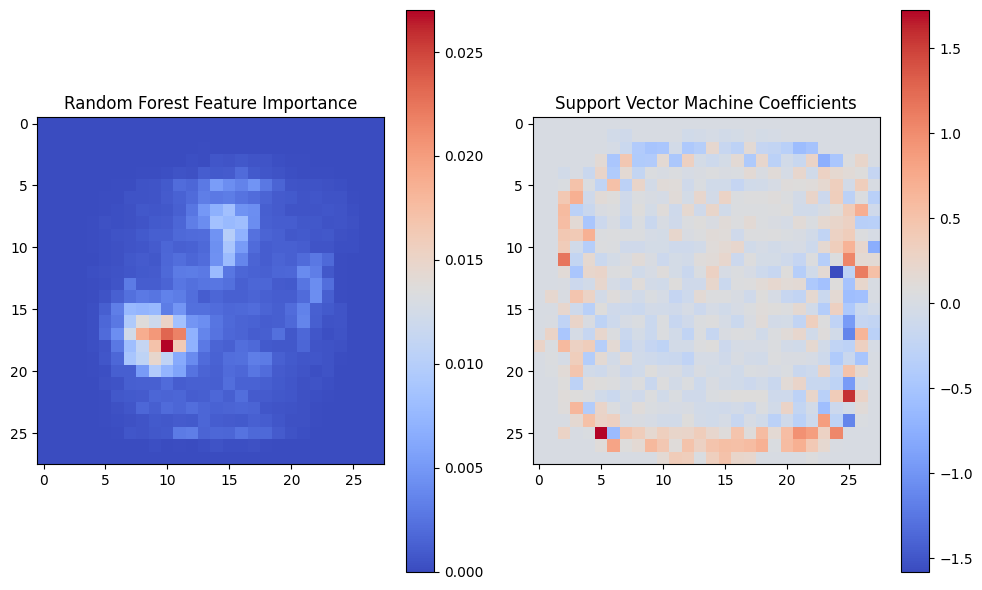

In [ ]:
# Visualización de la importancia de las características de RandomForest
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(rf.feature_importances_.reshape(28, 28), cmap=plt.cm.coolwarm)
plt.colorbar()
plt.title('Random Forest Feature Importance')

# Visualización de los coeficientes de Support Vector Machine
plt.subplot(1, 2, 2)  
plt.imshow(svm.coef_.reshape(28, 28), cmap=plt.cm.coolwarm)
plt.colorbar()
plt.title('Support Vector Machine Coefficients')

plt.tight_layout()
plt.show()

## Entrenamiento del Multi-Layer Perceptron (MLP)


Se utiliza la biblioteca TensorFlow y su API Keras para construir un modelo de red neuronal. Se construye un modelo de red neuronal secuencial con tres capas densas. Cada capa densa aplica una transformación lineal seguida de una función de activación no lineal.

In [ ]:
from tensorflow.keras import models, layers, metrics
model = models.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
import tensorflow as tf
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))
    
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    f1_score = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    
    return f1_score

 Se realiza la compilación del modelo de red neuronal elaborado.

In [ ]:
recall = metrics.Recall()
precision = metrics.Precision()
model.compile(optimizer="sgd", loss='binary_crossentropy',
              metrics = ["accuracy", recall, precision, f1_score]) # binary crossentropy for binary classification

Se realiza el entrenamiento del modelo de red neuronal utilizando los datos de entrenamiento y luego se evalúa su precisión utilizando los datos de prueba


In [ ]:
print("Comenzando entrenamiento...")
history = model.fit(X_train,y_train,batch_size=32,epochs=100, verbose=False)
print("Modelo entrenado!")
loss, accuracy, recall, precision, f1 = model.evaluate(X_test, y_test, verbose=False)
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 score:', f1)

Comenzando entrenamiento...
Modelo entrenado!
Accuracy: 0.9384999871253967
Recall: 0.9154513478279114
Precision: 0.9614986777305603
F1 score: 0.9354226589202881


Para obtener un resumen del modelo de red neuronal desarrollado, se elaboró el siguiente código:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,583
Trainable params: 1,583
Non-trainable params: 0
_________________________________________________________________


 El modelo desarrollado es de tipo secuencial consta de tres capas densas y tiene un total de 1,583 parámetros entrenables. La primera capa densa tiene 2 neuronas de salida. La segunda capa densa tiene 3 neuronas de salida. Y, la tercera capa tiene 1 neurona de salida. Para cada capa, se muestra el número de parámetros entrenables. En este caso, la primera capa tiene 1570 parámetros, la segunda capa tiene 9 parámetros y la tercera capa tiene 4 parámetros.

Se obtiene las métricas de entrenamiento del modelo y luego se grafica la curva de pérdida y precisión durante el entrenamiento

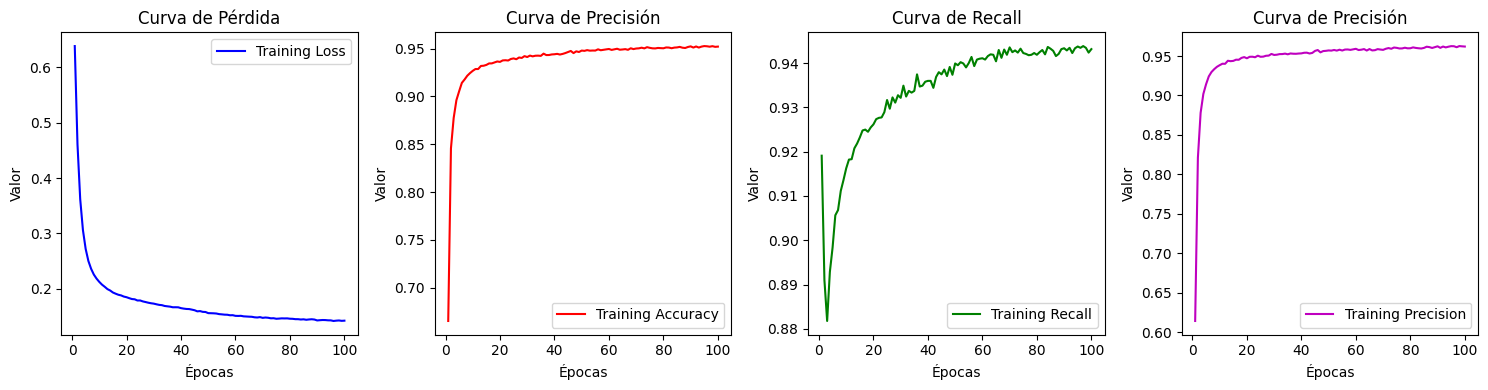

In [ ]:
# Obtener las métricas del entrenamiento
train_loss = history.history['loss']
train_acc = history.history['accuracy']
train_pre = history.history['precision']
train_re = history.history['recall']
train_f1 = history.history['f1_score']

epochs = range(1, len(train_loss) + 1)

# Crear un subplot de 1x4 para los gráficos
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

# Gráfico de la curva de pérdida
axs[0].plot(epochs, train_loss, 'b', label='Training Loss')
axs[0].set_title('Curva de Pérdida')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Valor')
axs[0].legend()

# Gráfico de la curva de precisión
axs[1].plot(epochs, train_acc, 'r', label='Training Accuracy')
axs[1].set_title('Curva de Precisión')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Valor')
axs[1].legend()

# Gráfico de la curva de recall
axs[2].plot(epochs, train_re, 'g', label='Training Recall')
axs[2].set_title('Curva de Recall')
axs[2].set_xlabel('Épocas')
axs[2].set_ylabel('Valor')
axs[2].legend()

# Gráfico de la curva de precisión
axs[3].plot(epochs, train_pre, 'm', label='Training Precision')
axs[3].set_title('Curva de Precisión')
axs[3].set_xlabel('Épocas')
axs[3].set_ylabel('Valor')
axs[3].legend()

plt.tight_layout()
plt.show()

 Se realiza predicciones utilizando el modelo de red neuronal entrenado en los datos de entrada X. Estas predicciones corresponden a una probabilidad de que el numero sea impar o no (impar='1' y par='0'). Luego, se aplica un umbral de 0.5 para convertir las predicciones en etiquetas binarias (0 o 1), es decir, si la probabilidad dada por la prediccion supera el 0.5 se asume que el numero de la imagen es impar. Por el contrario, si no lo supera se asume que el numero es par.

In [ ]:
y_pred=model.predict(X_train,batch_size=32)
y_pred = (y_pred >= 0.5).astype(int)

625/625 [==============================] - 1s 1ms/step


El código anterior nos permite obtener los pesos de una red neuronal de tipo Multilayer Perceptron (MLP) y visualizarlos en forma de imágenes. Estos pesos son fundamentales para la toma de decisiones de la red neuronal, ya que representan la importancia que se le asigna a cada pixel de entrada.



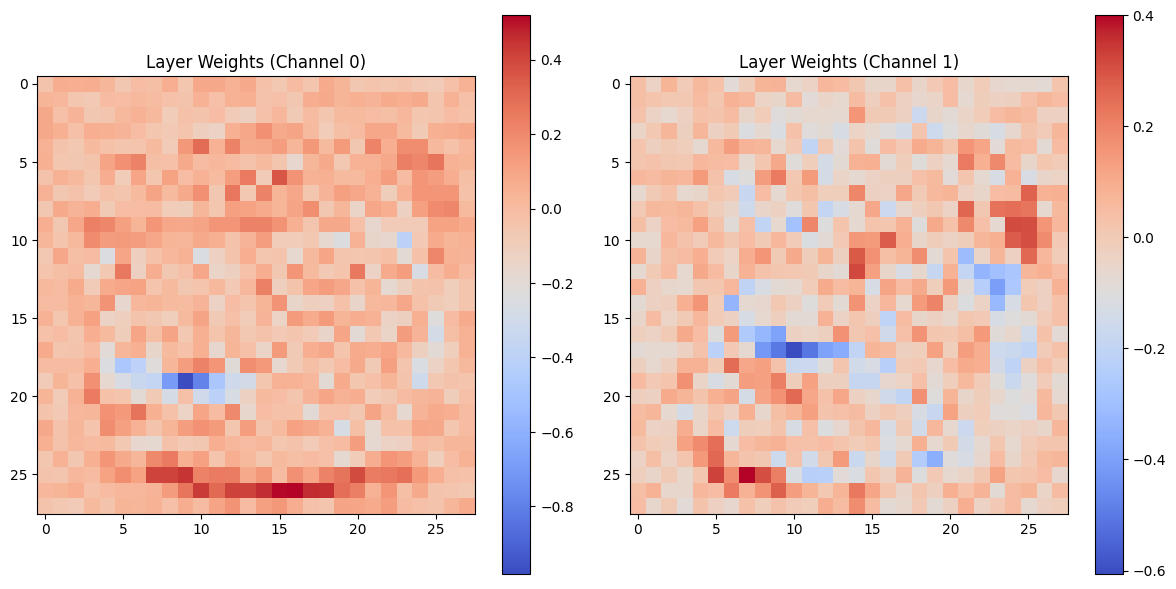

In [ ]:
# Obtener los pesos de la MLP
weights = model.get_weights()[0]

# Redimensionar los pesos a 28x28x2
reshaped_weights = weights.reshape(28, 28, 2)

# Visualizar los pesos de la MLP en dos subplots
plt.figure(figsize=(12, 6))

# Subplot para los pesos del canal 0
plt.subplot(1, 2, 1)
plt.imshow(reshaped_weights[:, :, 0], cmap=plt.cm.coolwarm)
plt.colorbar()
plt.title('Layer Weights (Channel 0)')

# Subplot para los pesos del canal 1
plt.subplot(1, 2, 2)
plt.imshow(reshaped_weights[:, :, 1], cmap=plt.cm.coolwarm)
plt.colorbar()
plt.title('Layer Weights (Channel 1)')

plt.tight_layout()
plt.show()

Se selecciona aleatoriamente 9 muestras de los datos de prueba y se muestra tanto las imágenes originales como las etiquetas reales y las predicciones correspondientes. De esta manera, se visualiza cómo el modelo ha clasificado correctamente o incorrectamente las muestras seleccionadas.

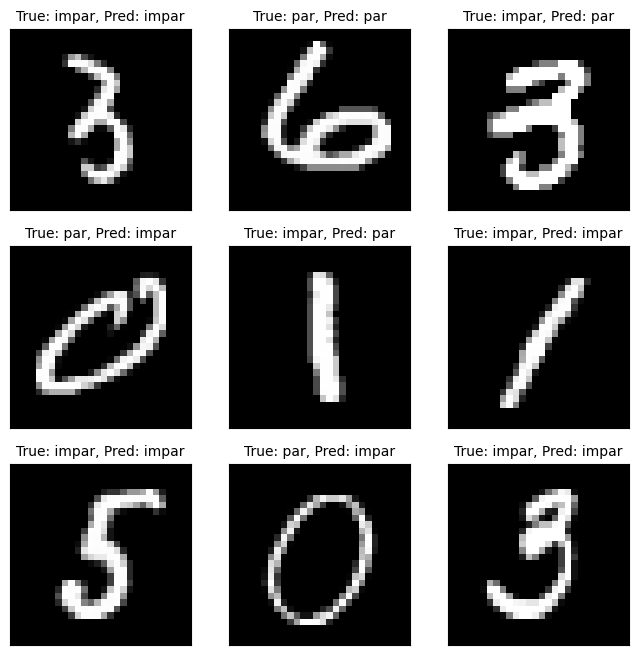

In [ ]:
sample_indices = random.sample(range(len(X_test)), 9)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

y_pred_samples = y_pred[sample_indices]

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].reshape((28,28)), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    true_label = 'par' if sample_labels[i] == 0 else 'impar'
    pred_label = 'par' if y_pred_samples[i] == 0 else 'impar'
    ax.set_title(f'True: {true_label}, Pred: {pred_label}', fontsize=10)
    
plt.show()

## Discusión

1. Basado en los reportes de clasificación proporcionados, el modelo Random Forest muestra un rendimiento superior comparado con los modelos de Support Vector Machine (SVM), Regresión Logística y Perceptrón Multicapa (MLP) en la tarea de clasificación sobre la base de datos MNIST. Con una precisión, recall y F1-score promedio ponderado del 97%, este modelo demostró una capacidad sólida para generalizar y clasificar correctamente ambas clases.
La SVM y la Regresión Logística presentaron un rendimiento similar, con todas las métricas promediando 90%. Aunque estos modelos tienen rendimientos aceptables, son significativamente inferiores al del modelo de Random Forest. Esta diferencia puede deberse a las ventajas intrínsecas del Random Forest, como la capacidad para manejar un alto número de características y su resistencia al sobreajuste.
El modelo MLP, sin embargo, se encuentra entre estos extremos. Su precisión es bastante alta (96.15%), pero su recall es más bajo (91.55%), lo que indica que el modelo puede estar teniendo dificultades para detectar todos los casos positivos. Aun así, su puntaje de precisión es notable, es decir que cuando el modelo predice una clase, suele estar en lo correcto. Con un F1-score de 93.54%, este modelo se posiciona por encima de la SVM y la Regresión Logística, pero por debajo del Random Forest.

2. Los pesos o importancias de las características de los modelos pueden ofrecernos una visión valiosa sobre cómo cada modelo percibe e interpreta los datos de entrada, en este caso, los píxeles de las imágenes en la base de datos MNIST.
El modelo Random Forest muestra que la mayoría de los píxeles tienen una importancia de 0, excepto por una zona concentrada con un valor máximo de 0.025. Esto indica que el modelo está utilizando principalmente información de esta zona específica para hacer predicciones, posiblemente indicando un área de alta variabilidad entre las diferentes clases.
En el caso del modelo SVM, se observa que los píxeles de mayor peso están cerca de los bordes, con un valor máximo de 1.5. Esto puede indicar que el modelo está reconociendo características específicas o patrones en los bordes de las imágenes para hacer sus clasificaciones.
Por último, en el modelo MLP, los pesos varían entre positivos y negativos en dos canales. En el canal 0, una zona lineal delgada en la parte inferior tiene la mayor importancia, mientras que hay valores negativos de importancia concentrados en una zona específica. En el canal 1, los valores de importancia negativa están más dispersos, al igual que los de mayor importancia. Los pesos negativos pueden indicar que la presencia de ciertos patrones o características está disuadiendo al modelo de clasificar la imagen como una determinada clase, mientras que los pesos positivos están alentando dicha clasificación.

3. Al utilizar un MLP con la base de datos MNIST, se ha logrado obtener un alto nivel de precisión y exactitud en la clasificación de números. Sin embargo, es importante tener en cuenta que esta base de datos presenta un formato de entrada que es ideal para la estructura de la red neuronal utilizada. Si se hubieran empleado imágenes más complejas, con variaciones en tamaño, profundidad y espacialidad, es probable que la precisión y exactitud del modelo se hubieran visto afectadas negativamente. Ello se ve respaldado en la literatura existente, donde se destaca una limitación del MLP en la consideración de la información espacial. El MLP trata las imágenes como vectores aplanados, lo que implica que no toma en cuenta la estructura espacial presente en las imágenes [2]. Este enfoque puede representar una desventaja significativa en problemas de clasificación, ya que la ubicación y las relaciones espaciales entre los píxeles son elementos cruciales para lograr una clasificación precisa.

# Conclusiones

1. El modelo de Random Forest parece ser el más efectivo para clasificar las imágenes de dígitos en la base de datos MNIST. Sin embargo, es importante tener en cuenta que estos resultados pueden variar en función de los parámetros utilizados durante el entrenamiento, la representación de los datos, entre otros factores.
2. Según los mapas de calor de las importancias de las características, los tres modelos están prestando atención a diferentes aspectos de las imágenes para hacer sus predicciones.

3. Aunque el MLP ha mostrado buenos resultados en la clasificación de la base de datos MNIST, es necesario reconocer sus limitaciones en términos de falta de consideración de la información espacial. Para abordar problemas más complejos que involucren imágenes con variaciones en tamaño, profundidad y espacio, es recomendable considerar el uso de arquitecturas como las redes neuronales convolucionales (CNN) que están diseñadas específicamente para capturar las características espaciales y obtener resultados más precisos en tareas de clasificación [2].

## Referencias

[1] Data Science, “Base de datos del MNIST — Procesamiento del Lenguaje Natural.” https://datascience.eu/es/procesamiento-del-lenguaje-natural/base-de-datos-del-mnist/ (accessed Jun. 01, 2023).

[2] Uniqtech, “Multilayer Perceptron (MLP) vs Convolutional Neural Network in Deep Learning | Data Science Bootcamp | Medium.” https://medium.com/data-science-bootcamp/multilayer-perceptron-mlp-vs-convolutional-neural-network-in-deep-learning-c890f487a8f1 (accessed Jun. 01, 2023).